### We import necessary libraries

Some of the libraries we will be working with include:

    Pandas
    Numpy
    Matplotlib
    Seaborn

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

***LOAD THE DATASET USING PANDAS***

From the dataset we can se we have the following columns:

    GRE- Graduate Record Examination
    SOP - Statement of Purpose
    CGPA - Cummulative Grade Point Average


In [3]:
df = pd.read_csv('Admission_Predict.csv')
df

,gre,sop,cgpa,admitted
0,337,4.5,9.65,1
1,324,4.0,8.87,1
2,316,3.0,8.00,1
3,322,3.5,8.67,1
4,314,2.0,8.21,0
...,...,...,...,...
395,324,3.5,9.04,1
396,325,3.0,9.11,1
397,330,5.0,9.45,1
398,312,3.5,8.78,0


In [4]:
df.keys()

Index(['gre', 'sop', 'cgpa', 'admitted'], dtype='object')

In [5]:
df.isnull().sum()

gre         0
sop         0
cgpa        0
admitted    0
dtype: int64

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   gre       400 non-null    int64  
 1   sop       400 non-null    float64
 2   cgpa      400 non-null    float64
 3   admitted  400 non-null    int64  
dtypes: float64(2), int64(2)
memory usage: 12.6 KB


In [7]:
df.describe()

,gre,sop,cgpa,admitted
count,400.000000,400.000000,400.000000,400.000000
mean,316.807500,3.400000,8.598925,0.547500
std,11.473646,1.006869,0.596317,0.498362
min,290.000000,1.000000,6.800000,0.000000
25%,308.000000,2.500000,8.170000,0.000000
50%,317.000000,3.500000,8.610000,1.000000
75%,325.000000,4.000000,9.062500,1.000000
max,340.000000,5.000000,9.920000,1.000000


In [8]:
df.corr()

,gre,sop,cgpa,admitted
gre,1.000000,0.612831,0.833060,0.580391
sop,0.612831,1.000000,0.718144,0.444029
cgpa,0.833060,0.718144,1.000000,0.521654
admitted,0.580391,0.444029,0.521654,1.000000


### OBSERVATIONS FROM THE CORRELATION PLOT
We observe from the plot :

    1. That CGPA and GRE scores have a strong correlation of 0.83
    2. CGPA and SOP have a correlation of 0.72
    3. ADMITTED and SOP have the least correlation of 0.44
    4. All columns of this dataset are all positively correlated

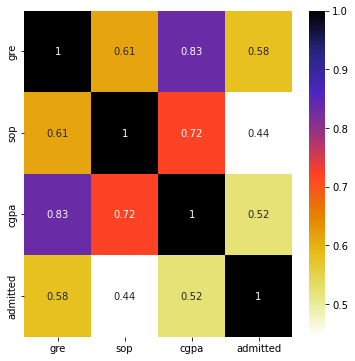

In [9]:
plt.figure(figsize=(6,6))
sns.heatmap(df.corr(), annot=True, cmap=plt.cm.CMRmap_r)
plt.show()


In [15]:
x = df[['gre', 'sop', 'cgpa']]

In [19]:
y = df['admitted']

In [16]:
x.head()

,gre,sop,cgpa
0,337,4.5,9.65
1,324,4.0,8.87
2,316,3.0,8.00
3,322,3.5,8.67
4,314,2.0,8.21


In [21]:
y.head()

0    1
1    1
2    1
3    1
4    0
Name: admitted, dtype: int64

In [24]:
from sklearn.model_selection import train_test_split

In [25]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.1, random_state=10)

In [26]:
x_train

,gre,sop,cgpa
151,332,5.0,9.28
392,326,4.0,9.12
66,327,3.0,9.02
37,300,1.0,7.80
295,317,3.0,8.57
...,...,...,...
369,301,2.0,8.03
320,317,4.0,8.50
15,314,3.5,8.30
125,300,2.0,8.66


In [27]:
x_test

,gre,sop,cgpa
332,308,3.5,8.21
111,321,4.0,8.68
352,303,3.0,8.06
205,295,2.5,7.65
56,316,2.0,7.40
379,311,2.5,8.43
81,340,5.0,9.50
214,331,4.5,9.42
142,331,4.0,9.44
110,305,3.0,8.48


In [28]:
y_train

151    1
392    1
66     0
37     0
295    0
      ..
369    1
320    1
15     0
125    1
265    0
Name: admitted, Length: 360, dtype: int64

In [29]:
y_test

332    1
111    1
352    1
205    0
56     0
379    1
81     1
214    1
142    1
110    0
119    1
172    1
373    1
274    0
24     1
276    1
78     1
65     0
43     0
339    1
47     0
105    1
351    1
280    1
366    1
113    0
241    0
253    1
390    0
398    0
1      1
6      1
183    0
26     0
331    1
173    1
367    0
208    0
154    0
138    1
Name: admitted, dtype: int64

### IMPORTING THE STANDARD SCALER FEATURE

To ensure all our x columns are all of the same scale. This will in turn help the model to give a better performance

In [30]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [31]:
x_train_transformed = scaler.fit_transform(x_train)
x_test_transformed = scaler.fit_transform(x_test)

### IMPORTING MACHINE LEARNING CLASSIFICATION ALGORITHMNS

For our classification project, we import different algoithmns, they include:

    1. Logistic Regression
    2. Support Vector Machine Classifier
    3. Random Forest Classifier 
    4. Decision Tree Classifier
    5. Gaussian Naive Bayes Classifier
    6. K Nearest Neighbors Classfier
    7. Multiple Layer Perceptron Classifier

In [32]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier

### PUTTING ALL THE ALGORITHMNS INTO A DICTIONARY

In [33]:
models = {
    'LR': LogisticRegression(),
    'SVM':SVC(),
    'RF': RandomForestClassifier(),
    'DT': DecisionTreeClassifier(),
    'NB': GaussianNB(),
    'KNN': KNeighborsClassifier(),
    'NN': MLPClassifier()
}

### CREATING A FUNCTION  AND ITERATING THROUGH IT

A function is created to go through the models that have been put in the dictonary above, the function is meant to go through them one after the other

In [34]:
def model_building(model, x_train_transformed, x_test_transformed, y_train, y_test):
    model_fit = model.fit(x_train_transformed, y_train)
    print(model_fit, ':')
    y_pred = model.predict(x_test_transformed)
    score = model.score(x_test_transformed, y_test)
    print(score)

In [35]:
for i in range(len(models)):
    model = list(models.values())[i]
    model_building(model, x_train_transformed, x_test_transformed, y_train, y_test)

LogisticRegression() :
0.7
SVC() :
0.625
RandomForestClassifier() :
0.575
DecisionTreeClassifier() :
0.45
GaussianNB() :
0.6
KNeighborsClassifier() :
0.65
MLPClassifier() :
0.625


### SELECTING THE BEST PERFORMING MODEL
After Iterating through the dictionaries we can find out that the Logistic Regression model performs better than all other model with a score accuracy around 70 percent

In [36]:
log_reg = LogisticRegression()

In [37]:
log_reg.get_params()

{'C': 1.0,
 'class_weight': None,
 'dual': False,
 'fit_intercept': True,
 'intercept_scaling': 1,
 'l1_ratio': None,
 'max_iter': 100,
 'multi_class': 'auto',
 'n_jobs': None,
 'penalty': 'l2',
 'random_state': None,
 'solver': 'lbfgs',
 'tol': 0.0001,
 'verbose': 0,
 'warm_start': False}

In [38]:
log_reg.fit(x_train_transformed, y_train)

LogisticRegression()

In [39]:
reg_pred = log_reg.predict(x_test_transformed)

In [40]:
reg_pred

array([0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1], dtype=int64)

In [41]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

In [42]:
print(mean_squared_error(y_test, reg_pred))
print(mean_absolute_error(y_test, reg_pred))

0.3
0.3


### Making of a prediction system

Here we are testing our model using a data combination different from the test or training dataset
We performed the following:
    
    1. Put the new data into a python list
    2. Convert the list to an array
    3. Reshape the just conveted array 
    4. Scale the input array like we did with the training and test set
    5. Use our model to make a prediction

In [43]:
new_data = [337, 3.0, 7.71]

In [44]:
new_data_two = np.asarray(new_data)

In [45]:
new_data_two_reshaped = new_data_two.reshape(1, -1)

In [46]:
input_scaled = scaler.transform(new_data_two_reshaped)

In [47]:
log_reg.predict(input_scaled)

array([1], dtype=int64)

### Export the model to a pickle file
The model is being saved as a file it can be saved using Joblib or Pickle but in this case Pickle is our Saving option

In [48]:
import pickle

In [49]:
pickle.dump(log_reg, open('Log model.pkl', 'wb'))